<a href="https://colab.research.google.com/github/Yasna79/Challenge2-Telecom-X_Alura_latam/blob/main/Telecom_Latam0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**📌 Extracción(E - Extract)**

In [206]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [207]:
df = pd.read_json(Churn_de_Clientes)

In [208]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####**Viendo informacion del dato**

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


####**Aqui transformas columnas tipo diccionario en columnas normales**

In [210]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)


####**Mostrando el dato en forma aleatoria**

In [211]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4000,5469-NUJUR,No,Male,0,No,No,19,Yes,No,Two year,...,Mailed check,19.95,373.5,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5436,7442-YGZFK,No,Male,0,No,No,1,Yes,Yes,Month-to-month,...,Credit card (automatic),49.80,49.8,DSL,No,No,No,No,No,No
2693,3733-UOCWF,No,Male,1,Yes,No,61,Yes,Yes,One year,...,Bank transfer (automatic),85.55,5251.75,Fiber optic,No,Yes,No,Yes,No,No
1351,1952-DVVSW,No,Female,0,Yes,No,10,Yes,No,One year,...,Mailed check,20.10,184.4,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2077,2925-MXLSX,No,Female,0,No,No,30,Yes,Yes,One year,...,Credit card (automatic),68.95,2038.7,DSL,No,Yes,Yes,No,Yes,No
1980,2806-MLNTI,No,Male,1,Yes,No,52,Yes,Yes,One year,...,Bank transfer (automatic),105.10,5376.4,Fiber optic,No,Yes,Yes,No,Yes,Yes
6175,8456-QDAVC,No,Male,0,No,No,19,Yes,No,Month-to-month,...,Bank transfer (automatic),78.70,1495.1,Fiber optic,No,No,No,No,Yes,No
2580,3594-KADLU,No,Male,0,Yes,No,3,No,No phone service,Month-to-month,...,Mailed check,35.10,101.1,DSL,Yes,No,No,Yes,No,No
1543,2208-MPXIO,No,Female,0,Yes,Yes,45,Yes,No,Two year,...,Bank transfer (automatic),20.00,886.4,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4125,5651-WYIPH,No,Female,1,No,No,18,Yes,No,Month-to-month,...,Credit card (automatic),49.85,865.75,DSL,No,Yes,No,No,No,No


In [212]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [214]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2068,2911-IJORQ,No,Male,0,No,No,37,Yes,Yes,One year,...,Bank transfer (automatic),90.60,3358.65,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1179,1685-BQULA,No,Female,0,No,No,40,Yes,Yes,Month-to-month,...,Bank transfer (automatic),93.40,3756.4,Fiber optic,No,Yes,Yes,No,Yes,No
7050,9710-NJERN,No,Female,0,No,No,39,Yes,No,Two year,...,Mailed check,20.15,826,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1462,2091-RFFBA,Yes,Female,1,No,No,31,Yes,Yes,Month-to-month,...,Electronic check,73.90,2217.15,Fiber optic,No,No,No,No,No,No
3237,4522-AKYLR,No,Female,1,No,No,13,Yes,No,Month-to-month,...,Electronic check,54.80,731.3,DSL,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,5606-AMZBO,No,Female,0,Yes,No,10,Yes,Yes,Month-to-month,...,Credit card (automatic),78.15,765.15,Fiber optic,Yes,No,No,No,No,No
6850,9450-TRJUU,No,Male,0,No,No,35,Yes,Yes,Month-to-month,...,Electronic check,83.15,2848.45,Fiber optic,No,No,No,No,Yes,No
3494,4824-GUCBY,No,Female,1,No,No,22,Yes,No,Month-to-month,...,Electronic check,81.70,1820.9,Fiber optic,Yes,Yes,No,No,No,No
6656,9143-CANJF,No,Female,0,Yes,Yes,24,Yes,No,Month-to-month,...,Electronic check,55.15,1319.85,DSL,Yes,No,No,Yes,No,No


###**Preguntando si hay datos nulos**

In [215]:
df.isna().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


####**Chequear si hay duplicados**

In [216]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


####**Cambiamos el tipo de variable, el nombre y borramos la antigua**

In [217]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)


In [218]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Renombrando Columnas**


In [219]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)



In [220]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Creando una nueva Columna y dividiendo cada valor entre 30**

In [221]:
df['DailyCharges'] = df['ChargesMonthly'] / 30



In [222]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
5759,7869-ZYDST,No,Male,0,Yes,No,31,Yes,Yes,Month-to-month,...,DSL,No,No,No,No,Yes,No,1882.80,59.05,1.968333
2197,3071-VBYPO,No,Male,0,Yes,Yes,3,Yes,No,Month-to-month,...,Fiber optic,Yes,Yes,No,No,Yes,No,248.40,89.85,2.995000
6911,9522-ZSINC,No,Male,0,No,No,13,Yes,No,One year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,253.80,19.95,0.665000
1019,1430-SFQSA,No,Male,0,No,No,29,No,No phone service,One year,...,DSL,Yes,No,No,Yes,No,No,1072.60,35.60,1.186667
5536,7586-ZATGZ,No,Male,0,No,No,40,Yes,Yes,Month-to-month,...,Fiber optic,No,No,No,No,Yes,No,3369.05,84.90,2.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1996-DBMUS,No,Female,1,Yes,No,48,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,No,No,3545.05,70.65,2.355000
2227,3099-OONVS,No,Male,0,Yes,Yes,25,Yes,No,Month-to-month,...,DSL,Yes,No,No,Yes,No,No,1296.80,54.30,1.810000
71,0114-RSRRW,No,Female,0,Yes,No,10,Yes,No,Month-to-month,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,187.75,19.95,0.665000
505,0719-SYFRB,Yes,Female,0,No,No,12,Yes,Yes,Month-to-month,...,DSL,Yes,No,Yes,Yes,No,No,713.75,61.65,2.055000


####**Columnas que deben ser transformadas: sólo las estrictamente "Yes"/"No"**


In [223]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


####**Reemplazar "No phone service" por "No" en la columna MultipleLines**


In [224]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()



,count
MultipleLines,
No,4202
Yes,3065


####**Transformar "Yes"/"No" a 1/0 en MultipleLines**


In [225]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [226]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


####**Reemplazar valores en la columna 'Contract'**


In [227]:
# df['Contract'] = df['Contract'].replace({
#     'Month-to-month': '1',
#     'One year': '2',
#     'Two year': '3'})

# df['Contract'] = df['Contract'].astype('int64')

# df['Contract'].value_counts()


In [228]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)



    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [229]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


####**Columnas que se transformarán: "Sí" → 1, todo lo demás → 0**


In [230]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


###**Recorre cada valor de la columna Churn del DataFrame df.**

####**Si el valor es 'Yes' o 'No', lo deja igual.**

####**Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'.**


---



In [231]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [232]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
N/A,224


In [233]:
df.to_json('Churn_de_Clientes.json', index= False)

##**📊 Carga y análisis(L - Load & Analysis)**

In [234]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1


,Total
Churn,
N/A,224
No,5174
Yes,1869


In [235]:
import matplotlib.pyplot as plt
import seaborn as sns


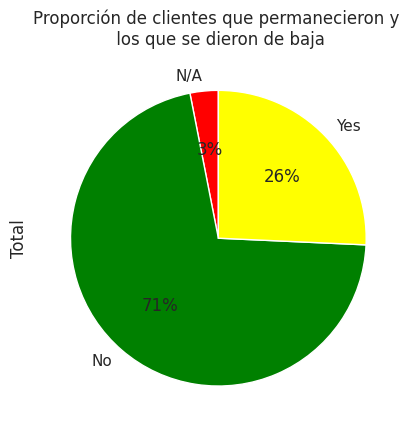

<Figure size 640x480 with 0 Axes>

In [236]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'green','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

####**Analizamos y creamos un grafico de recuento de evasión por variables categóricas**

In [237]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


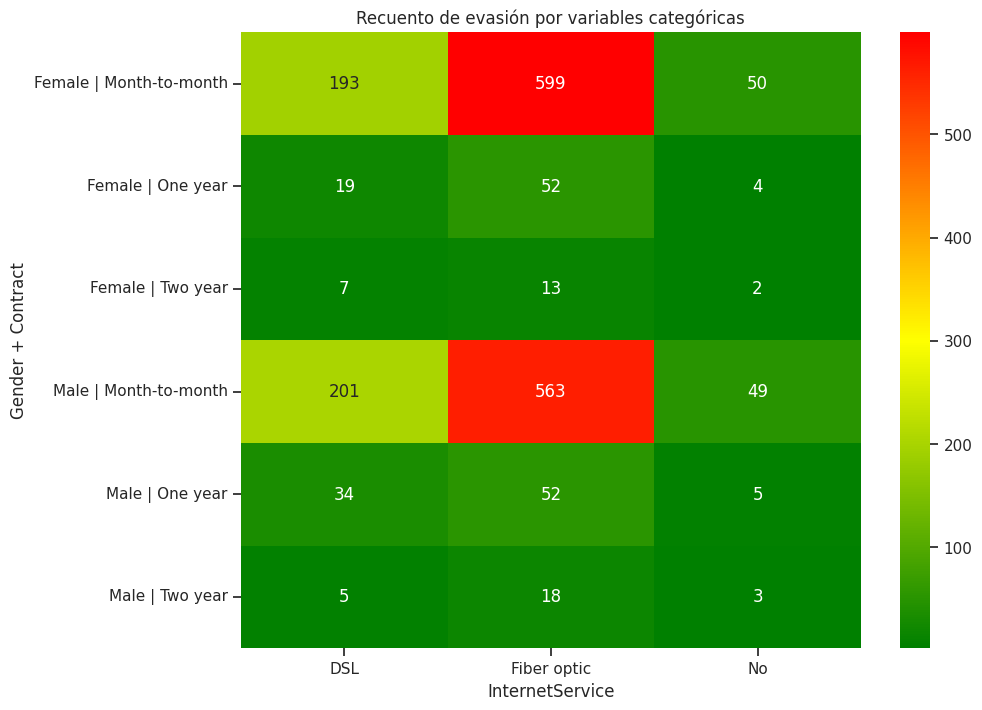

In [238]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["green", "yellow", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()





In [239]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num



,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


##**Conteo de evasión por variables numéricas**

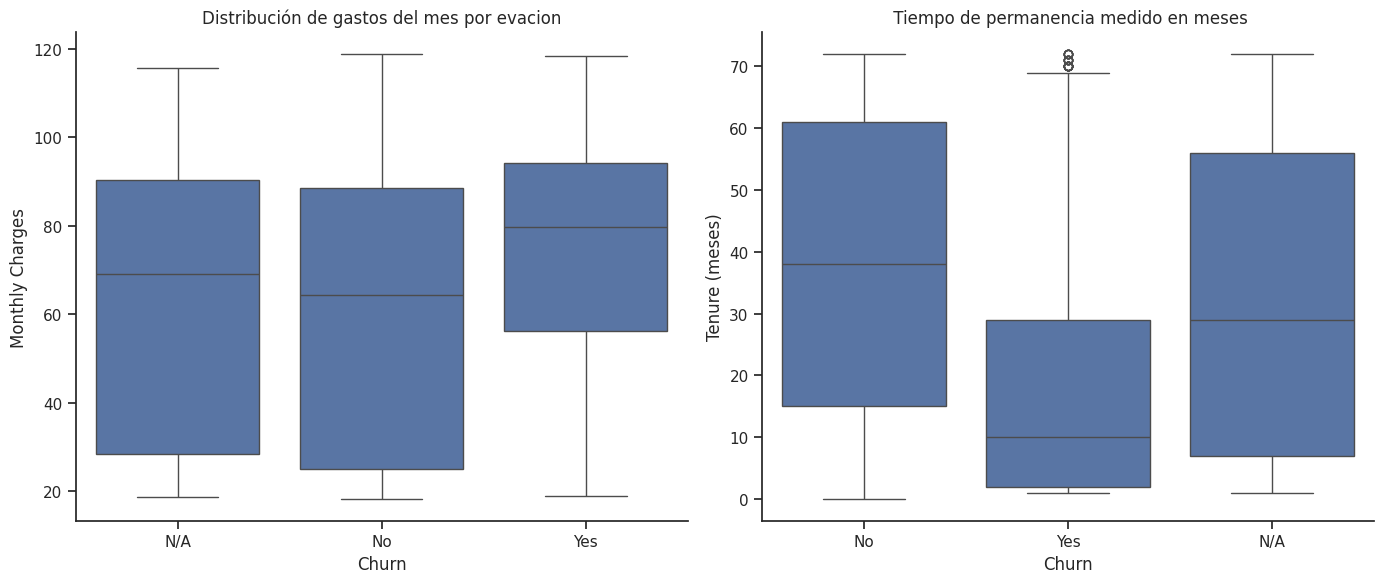

In [240]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()


#**Informe final**


#**🧾 Informe de ETL y Análisis Exploratorio – Churn de Clientes - Telecom X**
####**1. Extracción**
####**Fuente de datos:**

python
Copy
Edit
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'



##**🔄 2. Transformación (T - Transform)**
📦 a) Normalización de estructuras anidadas
Columnas anidadas (customer, phone, account, internet) fueron normalizadas y fusionadas con el DataFrame principal.

####**🧹 b) Limpieza de datos**
Se detectaron 0 valores nulos y 0 duplicados en customerID.

Se convirtieron columnas de tipo object a float (como Charges.Total y Charges.Monthly).

Se eliminaron las columnas originales luego de la transformación.

####**🏷️ c) Renombrado y creación de nuevas variables**
Renombrado de columnas claves como:
'gender' → 'Gender', 'tenure' → 'Tenure', 'customerID' → 'CustomerID'.

Se creó la columna DailyCharges dividiendo el gasto mensual por 30.

###**🔁 d) Transformación de variables categóricas**
Columnas binarias convertidas a 1/0:
['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines'].

Otras como 'OnlineSecurity', 'TechSupport', etc., también transformadas a binario.

'Contract' fue mapeada numéricamente (Month-to-month → 1, etc.).

Churn se estandarizó para tener solo valores 'Yes' o 'No'.

##**💾 3. Carga (L - Load)**
El DataFrame procesado se guardó como:
Churn_de_Clientes.json

python
Copy
Edit
df.to_json('Churn_de_Clientes.json', index=False)
####**📊 Análisis Exploratorio**
✅ Proporción de clientes que abandonaron
Se generó un gráfico tipo torta mostrando que una proporción significativa de clientes se dio de baja.


####**🔥 Análisis de clientes que abandonaron**
####**🧩 Recuento por género, contrato e internet**
Se construyó una tabla y heatmap:

Eje X: InternetService

Eje Y: Gender + Contract

Colores tipo semáforo (verde → bajo, rojo → alto)

####**📈 Visualización:**
python
Copy
Edit
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
📉 Análisis por variables numéricas
a) Cargos mensuales (Monthly Charges)
Clientes que se dieron de baja tienden a tener gastos mensuales más altos.

b) Tiempo de permanencia (Tenure)
Clientes que permanecen tienen un tenure significativamente mayor.

Gráficos:

Boxplots para ChargesMonthly y Tenure comparando Churn.

#**📌 Conclusión**
La transformación y análisis exploratorio revelan que:

Contratos a corto plazo, cargos mensuales elevados y menor antigüedad están fuertemente correlacionados con la evasión de clientes.

Este análisis preliminar allana el camino para modelos predictivos de churn y estrategias de retención más efectivas.




